In [3]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
import tensorflow as tf
import tensorflow.contrib.slim as slim

C:\Users\DELL\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\envs\testenv\lib\site-packages\tensorflow\pyth

In [4]:
media = input("Enter the media filename: ")

Enter the media filename: 9R.mp4


In [5]:
dim = 299

dum = cv2.resize(cv2.imread('Outputs/'+media.split('.')[0]+'/Deepface/Faces/'+media.split('.')[0]+'_30.png'), (dim,dim))
face = cv2.cvtColor(dum, cv2.COLOR_BGR2RGB)

dum = cv2.resize(cv2.imread('NoiseMaps/'+media.split('.')[0]+'/3.png'), (dim,dim))
noise = cv2.cvtColor(dum, cv2.COLOR_BGR2RGB)

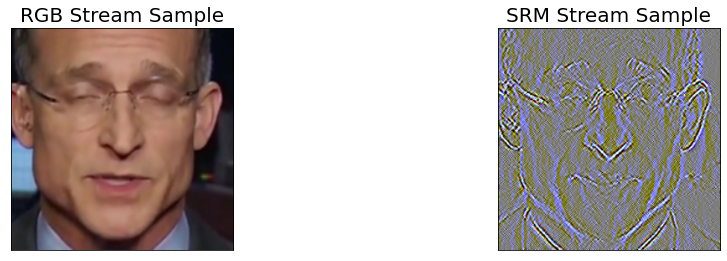

In [6]:
fig = plt.figure(figsize=(16,9))
fig.add_subplot(2,2,1)
plt.title('RGB Stream Sample', fontsize = 20)
plt.imshow(face)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
fig.add_subplot(2,2,2)
plt.title('SRM Stream Sample', fontsize = 20)
plt.imshow(noise)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.show;

# RGB Interpretation

In [7]:
rgb = load_model('Models/rgb_model_new_tensorflow_latest.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
rgb_inter = Model(rgb.input, rgb.layers[115].output)

In [9]:
tmp = np.array([face])
r_inter = rgb_inter.predict(tmp)
r_small_f = r_inter[0]

In [10]:
r_small_f

array([[[-1.3682349e+03,  1.7240453e+02, -4.4572430e+02, ...,
         -7.1633240e+01, -9.6115112e+02, -4.3474261e+02],
        [-2.9165122e+03,  3.2928278e+02, -8.2325446e+02, ...,
         -5.4152435e+02, -2.0041978e+03, -1.3916853e+03],
        [-4.3272310e+03,  7.4254230e+02, -1.2840479e+03, ...,
         -1.1364626e+03, -3.0744836e+03, -2.3714585e+03],
        ...,
        [-1.6786210e+03,  8.6076440e+02, -8.0532898e+02, ...,
         -1.2089436e+03, -1.6601997e+03, -1.2325530e+03],
        [-1.0247025e+03,  5.0173602e+02, -4.4707339e+02, ...,
         -6.3355774e+02, -1.0152675e+03, -4.4690350e+02],
        [-5.2336591e+02,  3.1277466e+02, -1.3218683e+02, ...,
         -3.0353345e+02, -4.8395779e+02, -1.3151176e+02]],

       [[-2.3808872e+03, -2.0811584e+02, -7.4954175e+02, ...,
         -4.1232434e+02, -1.7396251e+03, -8.2865930e+02],
        [-4.8536768e+03, -4.7646365e+02, -1.4298414e+03, ...,
         -1.4781616e+03, -3.5477156e+03, -2.4709075e+03],
        [-7.1029131e+03, 

In [11]:
r_small_f.shape

(19, 19, 728)

In [12]:
r_sf = r_small_f.transpose(2,0,1)
r_sf.shape

(728, 19, 19)

In [13]:
r_bf = np.zeros((len(r_sf), dim, dim))
for i in range(len(r_sf)):
    r_bf[i] = cv2.resize(r_sf[i], (dim, dim))

In [14]:
r_bf

array([[[-1368.23486328, -1368.23486328, -1368.23486328, ...,
          -523.36590576,  -523.36590576,  -523.36590576],
        [-1368.23486328, -1368.23486328, -1368.23486328, ...,
          -523.36590576,  -523.36590576,  -523.36590576],
        [-1368.23486328, -1368.23486328, -1368.23486328, ...,
          -523.36590576,  -523.36590576,  -523.36590576],
        ...,
        [ -545.66461182,  -545.66461182,  -545.66461182, ...,
          -405.07434082,  -405.07434082,  -405.07434082],
        [ -545.66461182,  -545.66461182,  -545.66461182, ...,
          -405.07434082,  -405.07434082,  -405.07434082],
        [ -545.66461182,  -545.66461182,  -545.66461182, ...,
          -405.07434082,  -405.07434082,  -405.07434082]],

       [[  172.40452576,   172.40452576,   172.40452576, ...,
           312.7746582 ,   312.7746582 ,   312.7746582 ],
        [  172.40452576,   172.40452576,   172.40452576, ...,
           312.7746582 ,   312.7746582 ,   312.7746582 ],
        [  172.40452576, 

In [15]:
r_bf.shape

(728, 299, 299)

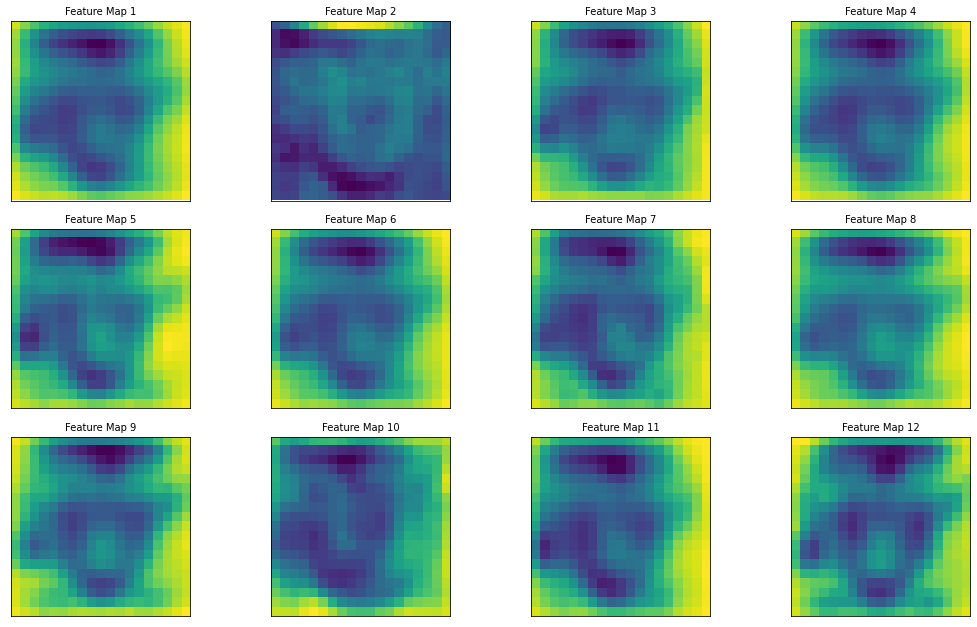

In [16]:
fig = plt.figure(figsize=(16,9))
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.title('Feature Map ' + str(i+1), fontsize = 10)
    plt.imshow(r_sf[i])
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

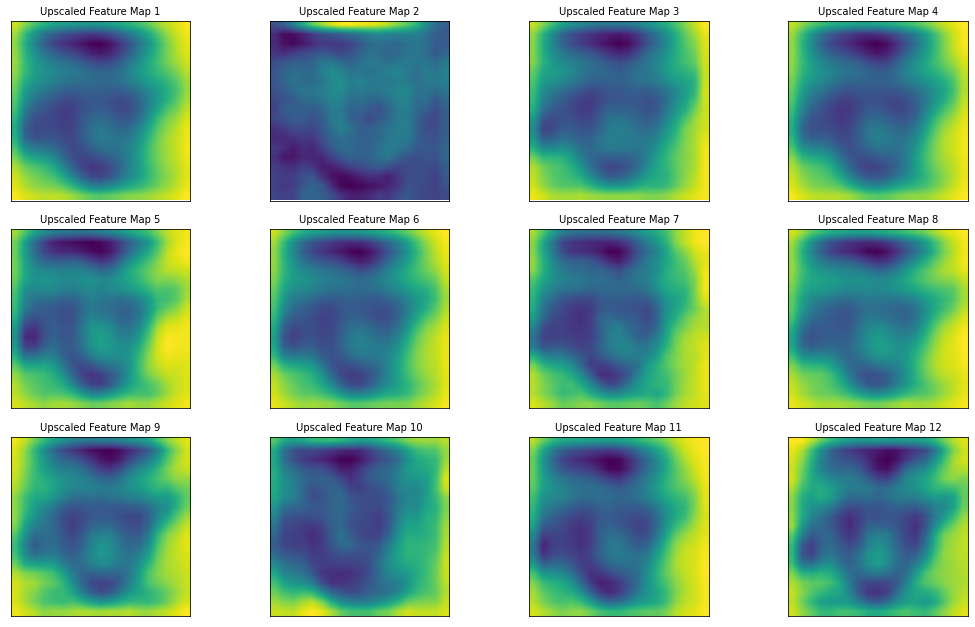

In [17]:
fig = plt.figure(figsize=(16,9))
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.title('Upscaled Feature Map ' + str(i+1), fontsize = 10)
    plt.imshow(r_bf[i])
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

In [18]:
r_af = np.zeros((len(r_bf), dim, dim))
for i in range(len(r_bf)):
    thres = np.percentile(r_bf[i], 80)
    for j in range(dim):
        for k in range(dim):
            if r_bf[i][j][k]>=thres:
                r_af[i][j][k] = 1

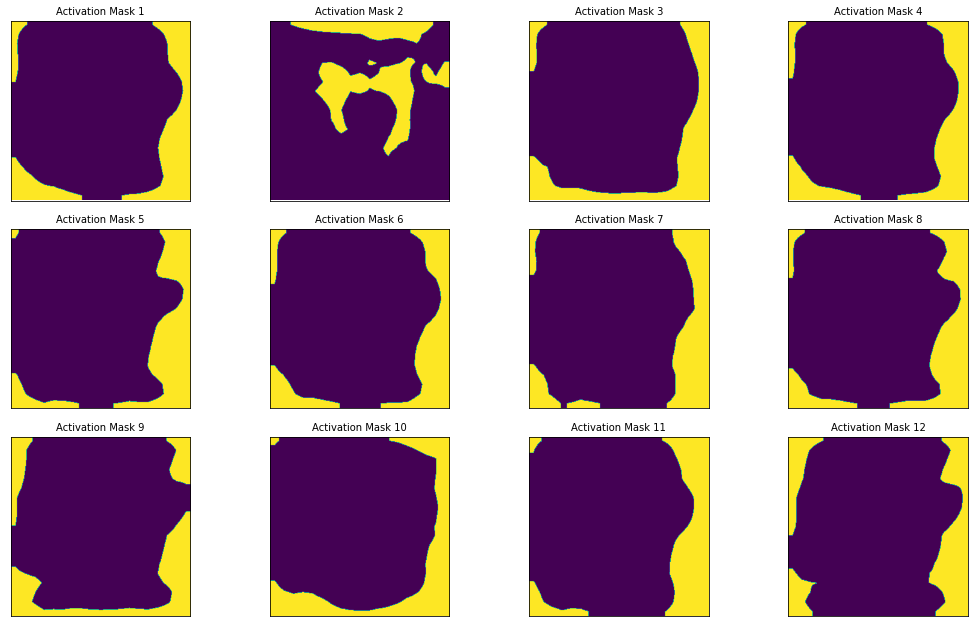

In [19]:
fig = plt.figure(figsize=(16,9))
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.title('Activation Mask ' + str(i+1), fontsize = 10)
    plt.imshow(r_af[i])
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

In [20]:
r_act_f = r_af.transpose(1,2,0)
r_act_f.shape

(299, 299, 728)

In [21]:
r_final = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        r_final[i][j] = np.sum(r_act_f[i][j])

In [22]:
r_final

array([[634., 634., 634., ..., 647., 647., 647.],
       [634., 634., 634., ..., 647., 647., 647.],
       [634., 634., 634., ..., 647., 647., 647.],
       ...,
       [647., 647., 647., ..., 653., 653., 653.],
       [647., 647., 647., ..., 653., 653., 653.],
       [647., 647., 647., ..., 653., 653., 653.]])

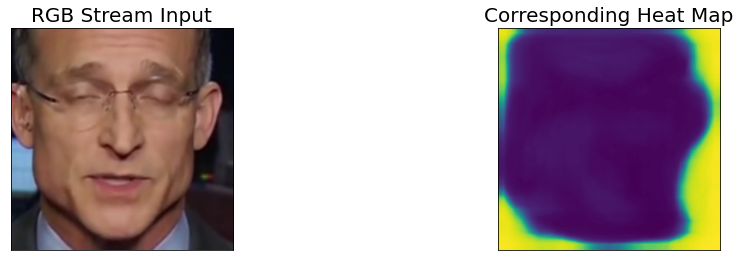

In [23]:
fig = plt.figure(figsize=(16,9))
fig.add_subplot(2,2,1)
plt.title('RGB Stream Input', fontsize = 20)
plt.imshow(face)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
fig.add_subplot(2,2,2)
plt.title('Corresponding Heat Map', fontsize = 20)
plt.imshow(r_final)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.show;

# SRM Interpretation

In [24]:
srm = load_model('Models/srm_model_new_tensorflow_lates.h5')

In [25]:
srm_inter = Model(srm.input, srm.layers[115].output)

In [26]:
tmp = np.array([noise])
s_inter = srm_inter.predict(tmp)
s_small_f = s_inter[0]

In [27]:
s_small_f

array([[[ -398.8547   ,   704.8994   ,  -200.87624  , ...,
          -437.87378  ,  -108.073975 ,  -698.62946  ],
        [-1317.796    ,  1398.8928   ,  -248.25615  , ...,
         -1424.7631   ,  -442.18048  , -1884.4403   ],
        [-2388.4624   ,  1727.3895   ,    -6.7654724, ...,
         -1735.0525   ,  -716.1362   , -2757.135    ],
        ...,
        [-2084.8994   ,  1502.4734   ,   140.67914  , ...,
         -1220.6995   ,  -718.34454  , -2595.83     ],
        [-3127.3137   ,  1294.4645   ,   444.5334   , ...,
         -1742.2878   ,  -853.80365  , -3319.6582   ],
        [-2610.73     ,   872.42706  ,   388.50253  , ...,
         -1704.0022   ,  -779.2312   , -2681.7466   ]],

       [[ -838.8534   ,   554.52344  ,  -547.6058   , ...,
          -493.6568   ,  -439.1058   ,  -836.82776  ],
        [-2097.5928   ,  1094.7515   ,  -716.923    , ...,
         -1403.6405   ,  -899.4643   , -2153.6772   ],
        [-3173.8416   ,  1325.8119   ,  -677.3192   , ...,
         -1666

In [28]:
s_small_f.shape

(19, 19, 728)

In [29]:
s_sf = s_small_f.transpose(2,0,1)
s_sf.shape

(728, 19, 19)

In [30]:
s_bf = np.zeros((len(s_sf), dim, dim))
for i in range(len(s_sf)):
    s_bf[i] = cv2.resize(s_sf[i], (dim, dim))

In [31]:
s_bf

array([[[ -398.85470581,  -398.85470581,  -398.85470581, ...,
         -2610.72998047, -2610.72998047, -2610.72998047],
        [ -398.85470581,  -398.85470581,  -398.85470581, ...,
         -2610.72998047, -2610.72998047, -2610.72998047],
        [ -398.85470581,  -398.85470581,  -398.85470581, ...,
         -2610.72998047, -2610.72998047, -2610.72998047],
        ...,
        [ -352.80941772,  -352.80941772,  -352.80941772, ...,
          -304.75939941,  -304.75939941,  -304.75939941],
        [ -352.80941772,  -352.80941772,  -352.80941772, ...,
          -304.75939941,  -304.75939941,  -304.75939941],
        [ -352.80941772,  -352.80941772,  -352.80941772, ...,
          -304.75939941,  -304.75939941,  -304.75939941]],

       [[  704.89941406,   704.89941406,   704.89941406, ...,
           872.42706299,   872.42706299,   872.42706299],
        [  704.89941406,   704.89941406,   704.89941406, ...,
           872.42706299,   872.42706299,   872.42706299],
        [  704.89941406, 

In [32]:
s_bf.shape

(728, 299, 299)

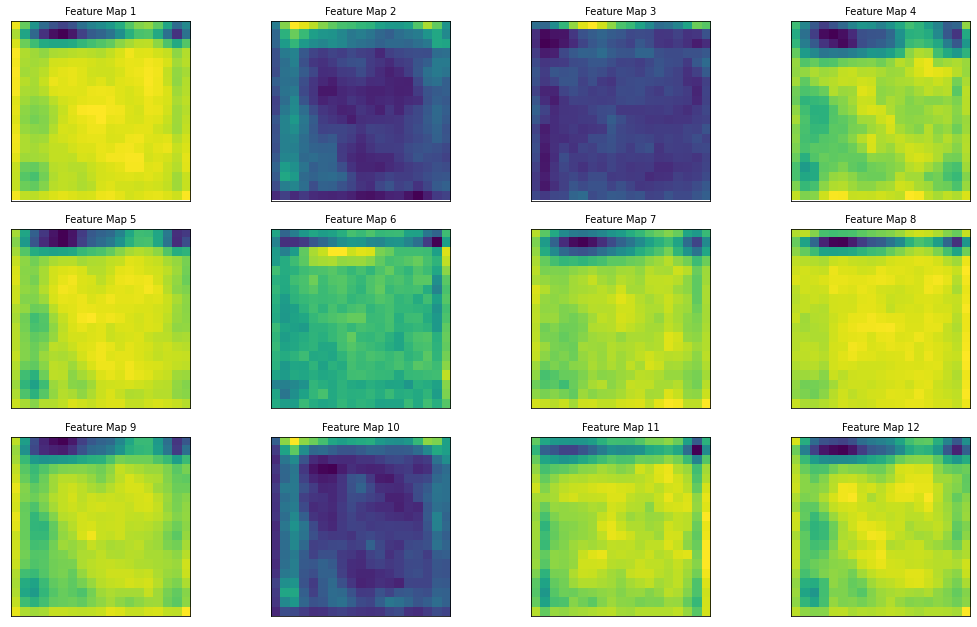

In [33]:
fig = plt.figure(figsize=(16,9))
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.title('Feature Map ' + str(i+1), fontsize = 10)
    plt.imshow(s_sf[i])
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

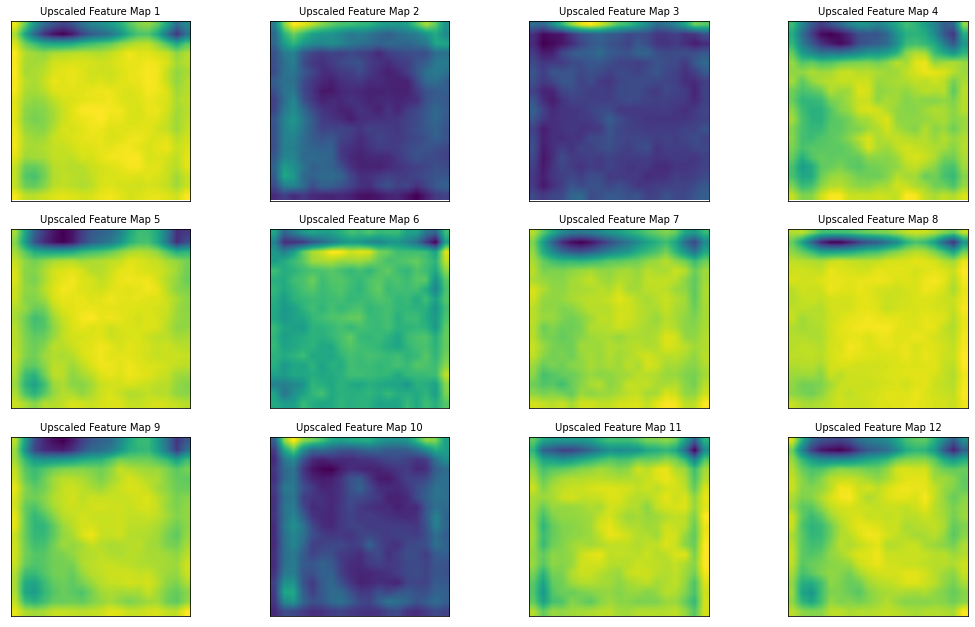

In [34]:
fig = plt.figure(figsize=(16,9))
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.title('Upscaled Feature Map ' + str(i+1), fontsize = 10)
    plt.imshow(s_bf[i])
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

In [35]:
s_af = np.zeros((len(s_bf), dim, dim))
for i in range(len(s_bf)):
    thres = np.percentile(s_bf[i], 80)
    for j in range(dim):
        for k in range(dim):
            if s_bf[i][j][k]>=thres:
                s_af[i][j][k] = 1

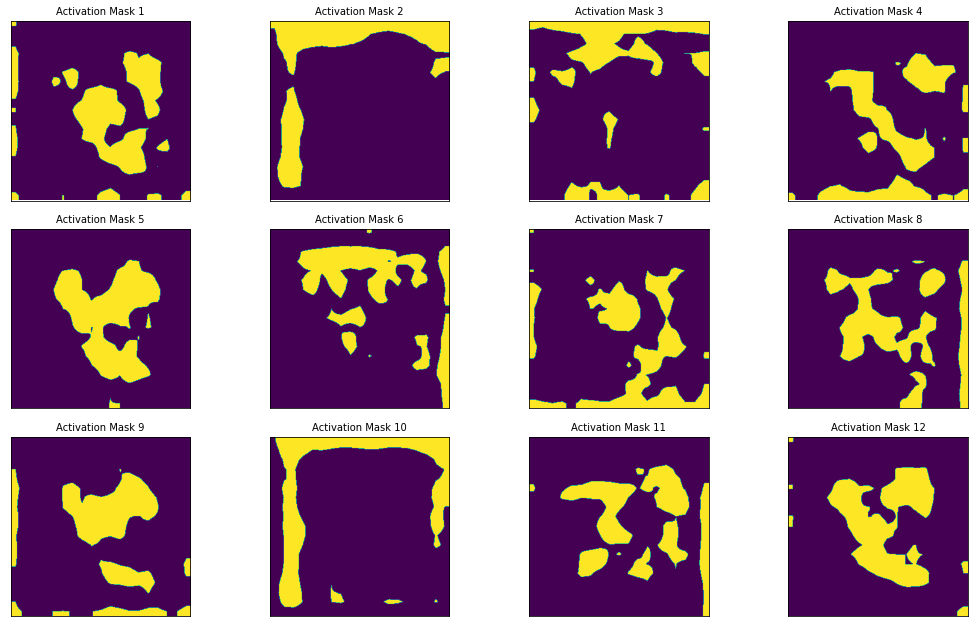

In [36]:
fig = plt.figure(figsize=(16,9))
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.title('Activation Mask ' + str(i+1), fontsize = 10)
    plt.imshow(s_af[i])
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

In [37]:
s_act_f = s_af.transpose(1,2,0)
s_act_f.shape

(299, 299, 728)

In [38]:
s_final = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        s_final[i][j] = np.sum(s_act_f[i][j])

In [39]:
s_final

array([[241., 241., 241., ..., 174., 174., 174.],
       [241., 241., 241., ..., 174., 174., 174.],
       [241., 241., 241., ..., 174., 174., 174.],
       ...,
       [496., 496., 496., ..., 507., 507., 507.],
       [496., 496., 496., ..., 507., 507., 507.],
       [496., 496., 496., ..., 507., 507., 507.]])

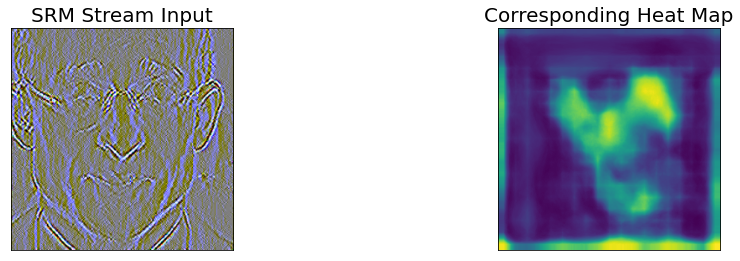

In [40]:
fig = plt.figure(figsize=(16,9))
fig.add_subplot(2,2,1)
plt.title('SRM Stream Input', fontsize = 20)
plt.imshow(noise)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
fig.add_subplot(2,2,2)
plt.title('Corresponding Heat Map', fontsize = 20)
plt.imshow(s_final)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.show;